In [9]:
# Hi, i am ging to use Linear regression for predicting the quality of the wine.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
dataset = pd.read_csv("C:\\Users\\Ideapad\\OneDrive\\Desktop\\winedataset\\winequality-red.csv")
dataset.sample(frac=1).reset_index(drop=True)

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
display(dataset.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

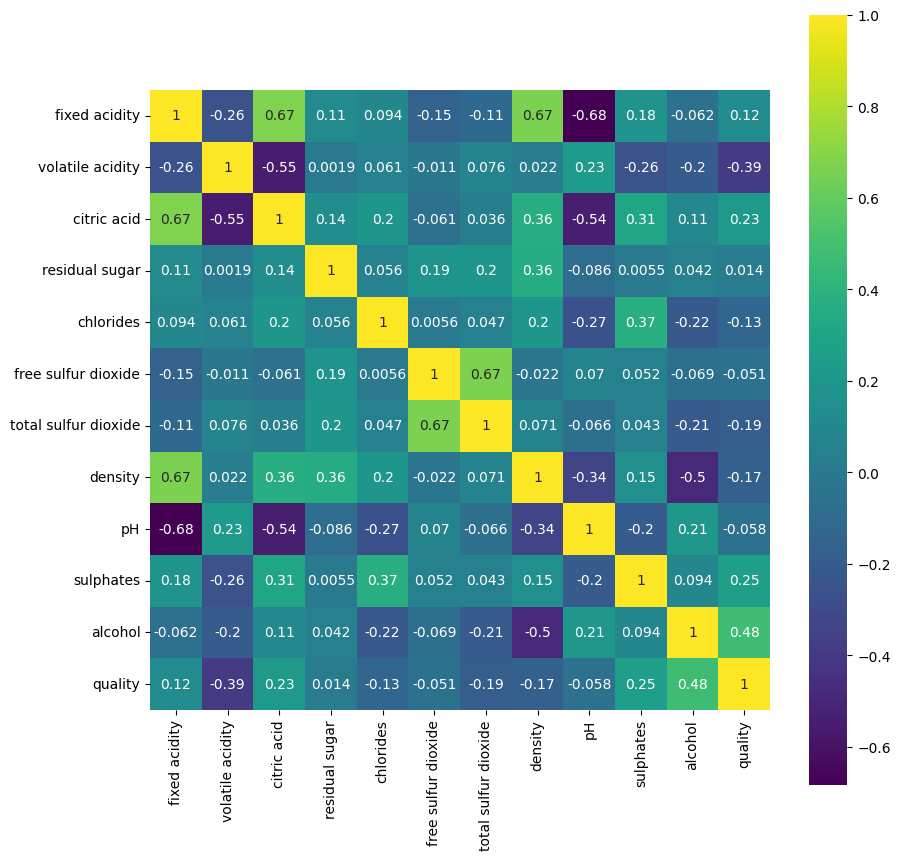

In [12]:
correlation = dataset.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')

In [13]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
dataset.quality.value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

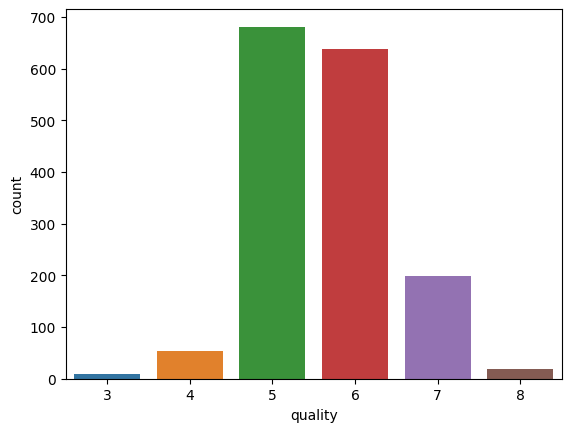

In [15]:
sns.countplot(x = 'quality', data = dataset)

In [16]:
dataset['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [17]:
dataset['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [18]:
dataset['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [19]:
dataset['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [20]:
dataset['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [21]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
IQR = q3 - q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [22]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = (dataset < lower_bound) | (dataset > upper_bound)
print(outliers)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0             False             False        False           False      False  \
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [23]:
dataset_out = dataset[~((dataset < lower_bound)) | (dataset > upper_bound).any(axis = 1)]
dataset_out.shape 

(1599, 12)

In [24]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [25]:
correlation = dataset_out.corr()['quality'].drop('quality')
correlation

fixed acidity           0.129306
volatile acidity       -0.370254
citric acid             0.224687
residual sugar          0.015713
chlorides              -0.113752
free sulfur dioxide    -0.062561
total sulfur dioxide   -0.206025
density                -0.142945
pH                     -0.051438
sulphates               0.249791
alcohol                 0.484746
Name: quality, dtype: float64

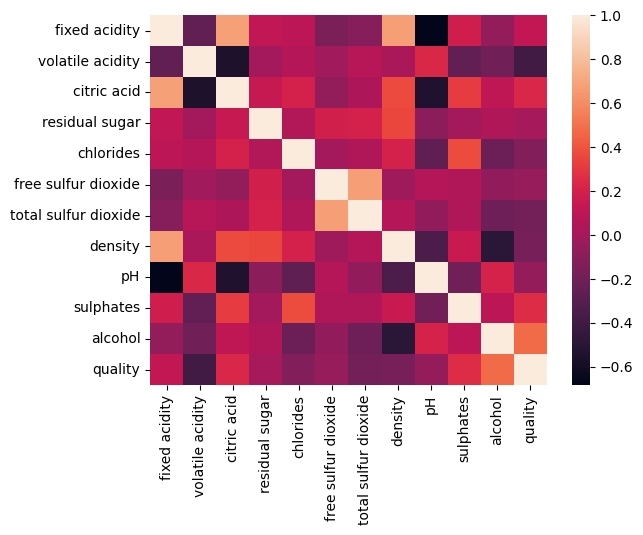

In [26]:
sns.heatmap(dataset.corr())
plt.show()

In [27]:
correlation.sort_values(ascending=False)

alcohol                 0.484746
sulphates               0.249791
citric acid             0.224687
fixed acidity           0.129306
residual sugar          0.015713
pH                     -0.051438
free sulfur dioxide    -0.062561
chlorides              -0.113752
density                -0.142945
total sulfur dioxide   -0.206025
volatile acidity       -0.370254
Name: quality, dtype: float64

In [28]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [ ]:
# Taking features  with correlation more than 0.05 as input and quality as target variable y 
# correlation_threshold = 0.05
features = get_features(correlation_threshold)
print(features)  
x = wines_out[features]
y = wines_out['quality']

In [ ]:
# To finding the number of outliers we have in our dataset with properties 

bx = sns.boxplot(x = 'quality', y = 'alcohol', data = dataset)
bx.set(xlabel = 'Qulaity', ylabel = 'Alcohol', title = 'Alcohol % in differeent  samples')

In [ ]:
# To finding the number of outliers we have in our dataset with properties 

bx = sns.boxplot(x = 'quality', y = 'sulphates', data = dataset)
bx.set(xlabel = 'Qulaity', ylabel = 'Sulphates', title = 'Sulphates % in differeent  samples')

In [ ]:
# To finding the number of outliers we have in our dataset with properties 

bx = sns.boxplot(x = 'quality', y = 'citric acid', data = dataset)
bx.set(xlabel = 'Qulaity', ylabel = 'Citric acid', title = 'Citric Acid  % in differeent  samples')

In [ ]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = dataset)
bx.set(xlabel='Quality', ylabel='Fixed Acidity', title='Fixed Acidity % in different samples')


In [ ]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64

In [ ]:
# wines_df_before = wines_df
# wines_df_after = wines_df.drop(['fixed acidity','citric acid','density'], axis = 1)

# X1 = sm.tools.add_constant(wines_df_before)
# X2 = sm.tools.add_constant(wines_df_after)

# series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
# series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display(series_before)
# display(series_after)

# wines_df = wines_df_after

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=42)

In [ ]:
# Filling Linear regression to training data 
missing_values = x_train.isnull().sum()
print(missing_values)
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer for x_train
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_train
x_train_imputed = imputer.fit_transform(x_train)

# Verify that there are no more missing values in x_train
print(np.isnan(x_train_imputed).sum())





fixed acidity            0
volatile acidity         0
citric acid              0
chlorides                8
free sulfur dioxide      0
total sulfur dioxide     0
density                 16
pH                      10
sulphates                0
alcohol                  0
dtype: int64
0


In [ ]:
# x_train.shape
# x_test.shape
# y_train.shape

# y_test.shape
# x.shape
y.shape


(1599,)

In [ ]:
# Filling Linear regression to training data 
missing_values = x_train.isnull().sum()
print(missing_values)
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer for x_train
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_train
x_train_imputed = imputer.fit_transform(x_train)

# Verify that there are no more missing values in x_train
print(np.isnan(x_train_imputed).sum())

# Now apply the imputer to x_test to handle missing values in the test set
x_test_imputed = imputer.transform(x_test)

# Fitting the Linear Regression model using preprocessed data
regressor = LinearRegression()
regressor.fit(x_train_imputed, y_train_imputed)


fixed acidity            0
volatile acidity         0
citric acid              0
chlorides                8
free sulfur dioxide      0
total sulfur dioxide     0
density                 16
pH                      10
sulphates                0
alcohol                  0
dtype: int64
0


LinearRegression()

In [ ]:
# To receive the intercept 
regressor.intercept_

-18.712675219318804

In [ ]:
# This gives the cofficient of the 10 features selected above 
regressor.coef_

array([-1.57243539e-02,  8.81458281e-02, -2.40160531e-02, -6.76564567e-02,
        1.54222406e-03, -2.51742798e-04,  2.46571038e+01, -2.54893954e-03,
        1.09776610e-01, -1.76050775e-02])

In [ ]:
train_pred = regressor.predict(x_train_imputed)
train_pred

array([5.74334075, 5.64302124, 5.65087632, ..., 5.70140364, 5.56901256,
       5.60527661])

In [ ]:
import numpy as np

# Check for NaN values in test_pred and y_test
print(np.isnan(test_pred).sum())
print(np.isnan(y_test).sum())


0
1


In [ ]:
# Reshape y_test into a 2D array
y_test_2d = y_test.values.reshape(-1, 1)

# Create an instance of SimpleImputer for y_test
imputer_y = SimpleImputer(strategy='mean')

# Fit and transform the imputer on y_test_2d
y_test_imputed = imputer_y.fit_transform(y_test_2d)

# Verify that there are no more missing values in y_test_imputed
print(np.isnan(y_test_imputed).sum())


0


In [ ]:
x_test_imputed = imputer.transform(x_test)

test_pred = regressor.predict(x_test_imputed)
print(test_pred)



[5.69676919 5.6411051  5.77516458 5.70229396 5.63024414 5.6992415
 5.65308668 5.66392419 5.65163564 5.66463165 5.59740714 5.69285271
 5.67487084 5.70618068 5.66172814 5.49786282 5.66581547 5.65971063
 5.60739592 5.70467466 5.64002805 5.69547438 5.56736048 5.54682164
 5.67625218 5.72370613 5.64265733 5.64377117 5.78095656 5.67100775
 5.66868868 5.59431345 5.66477108 5.6433389  5.72145154 5.64429396
 5.63022954 5.67619788 5.62057914 5.53247706 5.65386572 5.64836234
 5.62771136 5.66584946 5.69966044 5.69934784 5.6442716  5.6512722
 5.64490171 5.65025294 5.8532918  5.73114861 5.63405854 5.59829803
 5.69706694 5.68481205 5.63926667 5.69770467 5.61244538 5.7175581
 5.66702259 5.60623959 5.66561181 5.6452687  5.55698929 5.67958602
 5.53984484 5.77201251 5.62149061 5.70316324 5.52204916 5.69967431
 5.68154547 5.60944827 5.57372732 5.659362   5.67550992 5.67712568
 5.58088155 5.57373203 5.69967266 5.57752865 5.71246763 5.65943523
 5.67751399 5.60042265 5.68984021 5.64350976 5.611093   5.7169677

In [ ]:
from sklearn import metrics

train_rmse = metrics.mean_squared_error(train_pred,y_train_imputed)**0.5
train_rmse

0.7859990078922126

In [ ]:




test_rmse = mean_squared_error(y_test_imputed, test_pred, squared=False)
print(test_rmse)


0.8194691247851054


In [ ]:
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6.

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_imputed, test_pred))
print("Mean Squarred Error:", metrics.mean_squared_error(y_test_imputed, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test_imputed, test_pred))
print("Root mean squared error:", rmse)

Mean Absolute Error: 0.6918465673436418
Mean Squarred Error: 0.6715296464760665
Root mean squared error: 0.8194691247851054


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_imputed, test_pred)

-0.06437094454190517

In [ ]:
coeffecients = pd.DataFrame(regressor.coef_, features)
coeffecients.columns = ['coeffecients']
coeffecients

,coeffecients
fixed acidity,-0.015724
volatile acidity,0.088146
citric acid,-0.024016
chlorides,-0.067656
free sulfur dioxide,0.001542
total sulfur dioxide,-0.000252
density,24.657104
pH,-0.002549
sulphates,0.109777
alcohol,-0.017605


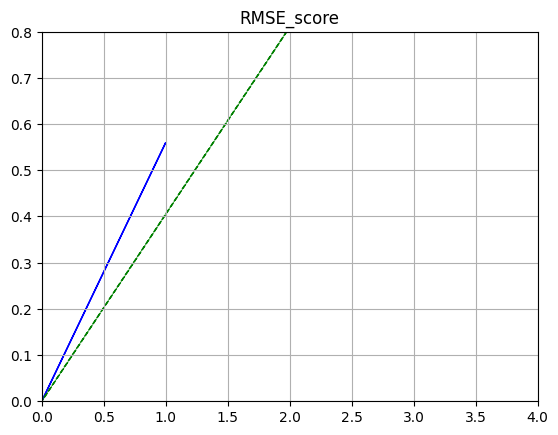

In [ ]:
ax = plt.axes()
color1 = 'Green'
color2 = 'Blue'
ax.arrow(0,0,1,0.56, head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,2,0.81, head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])

plt.grid()
plt.title("RMSE_score")
plt.show()

In [ ]:
ax = plt.axes()
color1 = 'Green'
color2 = 'Blue'
ax.arrow(0,0,-1,-0.40, head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,-1,-0.06, head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])

plt.grid()
plt.title("R2_score")
plt.show()

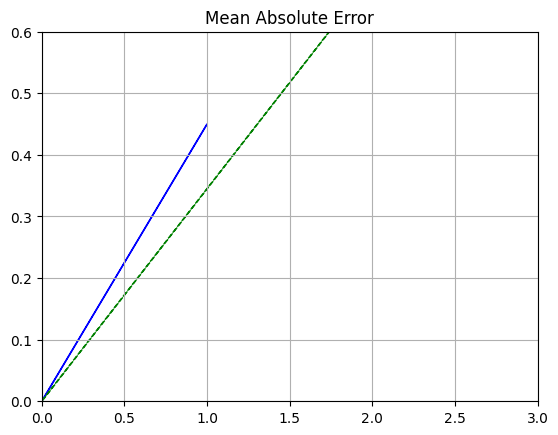

In [ ]:
ax = plt.axes()
color1 = 'Green'
color2 = 'Blue'
ax.arrow(0,0,1,0.45, head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,2,0.69, head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])

plt.grid()
plt.title("Mean Absolute Error")
plt.show()

In [ ]:
# From Here i have done only simple calculations based on linear regression

x = np.array(dataset.loc[:, dataset.columns != 'quality'])
y = np.array(dataset['quality'])
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
desc_df = wines_df.describe()

desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df


,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,0.179060,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,0.390000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,0.640000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000
+3_std,1.065000,6.768590,0.228662,47.255393,145.153766,3.774273,1.166670,13.619986,8.058731
-3_std,-0.009359,-1.690979,-0.053729,-15.505549,-52.218181,2.847954,0.149628,7.225980,3.213314


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

print(x_train.shape, x_test.shape)

(1439, 11) (160, 11)


In [ ]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicted values 
y_predict = regression_model.predict(x_test)
y_predict = np.round(y_predict)

sum = 0
for i,n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1
print(sum/len(y_test))